##**⚓⌛Major 2: Personality Prediction For Cultural Fit Validation⌛⚓** ##

✅ **Group:** G2

✅ **Successfully Completed by:**

   ⚡Anusha Goel
 
   ⚡Ratna Rajpal
 
   ⚡Shivangi Sharma

✅ **Big Data Batch:** B3

✅ **Under the guidance of:**

   ⚡ Ms. Sugandha Sharma


In [ ]:
from google.colab import drive
drive.mount('/MyDrive')

Mounted at /MyDrive


⏩**Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from collections import Counter
from itertools import chain
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder
from nltk.collocations import TrigramAssocMeasures, TrigramCollocationFinder
from nltk import ngrams

In [ ]:
#Loading the Dataset
data = pd.read_csv("/MyDrive/MyDrive/Major2/Dataset/mb_data.csv")
data.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [ ]:
#checking schema of teh dataset
data.describe()

,type,posts
count,8675,8675
unique,16,8675
top,INFP,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
freq,1832,1


In [ ]:
#checking for unique personality 16- MBTI personality types 
_classes = data.type.unique()
print(_classes)

['INFJ' 'ENTP' 'INTP' 'INTJ' 'ENTJ' 'ENFJ' 'INFP' 'ENFP' 'ISFP' 'ISTP'
 'ISFJ' 'ISTJ' 'ESTP' 'ESFP' 'ESTJ' 'ESFJ']


In [ ]:
#counting number of posts of each type in dataset in descending order
total = data.groupby(['type']).count().sort_values(by=['posts'],ascending=False)
total

,posts
type,
INFP,1832
INFJ,1470
INTP,1304
INTJ,1091
ENTP,685
ENFP,675
ISTP,337
ISFP,271
ENTJ,231


In [ ]:
#To check the class distibution in our dataset
def show_class_distribution(data, x="type", figsize=(16,4), title="Distribution of Personality Types", xticks_size=10, palette="husl"):
    plt.figure(figsize=figsize)
    sns.countplot(x=x, data=data, palette=palette)
    plt.xlabel("Personality Types", size=15)
    plt.ylabel("Counts", size=15)
    plt.xticks(size=xticks_size)
    plt.title(title, size=20)
    plt.show()

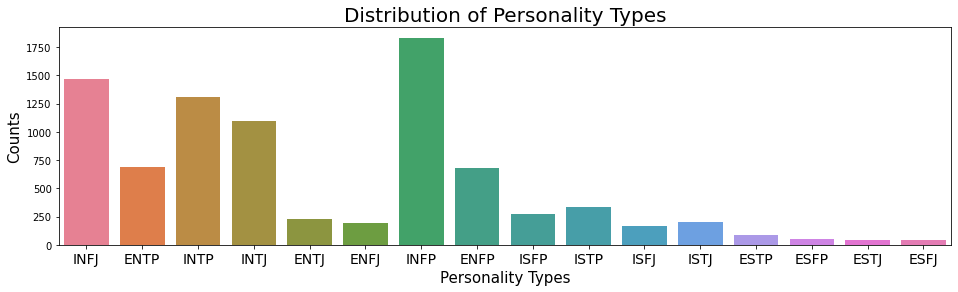

In [ ]:
show_class_distribution(data, xticks_size=14)

⚡**Conclusion:**

✅Data is imbalanced and has high data for INFP type
Data is disproportional w.r.t different personality types.

✅To prevent any misinterpretation of results due to skewed representation of classes in the test set we will perform data cleaning


In [ ]:
#Exploring more to the data to examine the distribution among various classes
def divide_types(df):
    df["E-I"] = ""
    df["N-S"] = ""
    df["F-T"] = ""
    df["J-P"] = ""
    for index, row in df.iterrows():
        row["E-I"] = "E" if row.type[0] == "E" else "I"
        row["N-S"] = "N" if row.type[1] == "N" else "S"
        row["F-T"] = "F" if row.type[2] == "F" else "T"
        row["J-P"] = "J" if row.type[3] == "J" else "P"
    return df

data = divide_types(data)

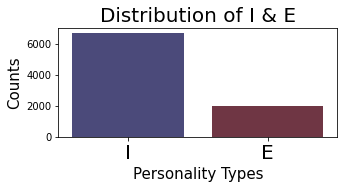

In [ ]:
show_class_distribution(data, x="E-I", title="Distribution of I & E", figsize=(5,2), xticks_size=20, palette="icefire")


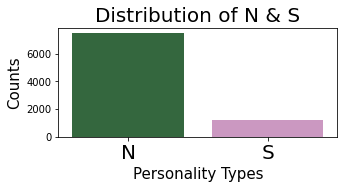

In [ ]:
show_class_distribution(data, x="N-S", title="Distribution of N & S", figsize=(5,2), xticks_size=20, palette="cubehelix")


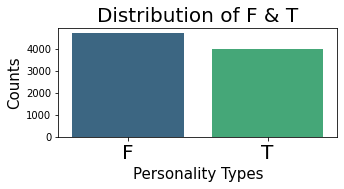

In [ ]:
show_class_distribution(data, x="F-T", title="Distribution of F & T", figsize=(5,2), xticks_size=20, palette="viridis")


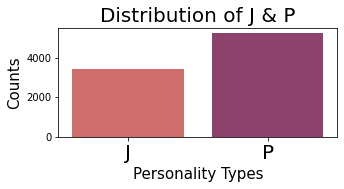

In [ ]:
show_class_distribution(data, x="J-P", title="Distribution of J & P", figsize=(5,2), xticks_size=20, palette="flare")


In [ ]:
data.loc[2, "posts"]

"'Good one  _____   https://www.youtube.com/watch?v=fHiGbolFFGw|||Of course, to which I say I know; that's my blessing and my curse.|||Does being absolutely positive that you and your best friend could be an amazing couple count? If so, than yes.   Or it's more I could be madly in love in case I reconciled my feelings (which at...|||No, I didn't; thank you for a link!|||So-called Ti-Si loop (and it can stem from any current topic/obsession) can be deadly. It's like when you're stuck in your own thoughts, and your mind just wanders in circles. Feels truly terrible. ...|||Have you noticed how peculiar vegetation can be? All you have to do is look down at the grass: dozens of different plant species there.    And now imagine that hundreds of years later (when/if soil...|||The Smiths – Never Had No One Ever|||I often find myself spotting faces on marble tiles/wood.|||This 5 year-old sentence is an incredibly accurate and beautiful description.|||I haven't visited this website in the last 3

⚡**Conclusion:** 

❎ Data is imbalanced

❎ Data needs to cleaned.

In [ ]:
#To expand words like don't to do not I'd to I would to ensure text generalization
!pip install contractions

In [ ]:
#Fixing the contractions or short words
import contractions

def fix_contractions(df, column_name = "posts", new_column="cleaned_post"):
    df[new_column] = df[column_name].apply(lambda x: contractions.fix(x))
    return df

data = fix_contractions(data)

In [ ]:
data.loc[1, "posts"]

"'I'm finding the lack of me in these posts very alarming.|||Sex can be boring if it's in the same position often. For example me and my girlfriend are currently in an environment where we have to creatively use cowgirl and missionary. There isn't enough...|||Giving new meaning to 'Game' theory.|||Hello *ENTP Grin*  That's all it takes. Than we converse and they do most of the flirting while I acknowledge their presence and return their words with smooth wordplay and more cheeky grins.|||This + Lack of Balance and Hand Eye Coordination.|||Real IQ test I score 127. Internet IQ tests are funny. I score 140s or higher.  Now, like the former responses of this thread I will mention that I don't believe in the IQ test. Before you banish...|||You know you're an ENTP when you vanish from a site for a year and a half, return, and find people are still commenting on your posts and liking your ideas/thoughts. You know you're an ENTP when you...|||http://img188.imageshack.us/img188/6422/6020d1f9da

**Data Cleaning**

✅Removing numerical values 

✅converting all data to lowercase  Hence removing case-sensitivity 

✅Removing punctuations 

✅Removing Hashtags 

✅Removing links


In [ ]:
#Performing data cleaning
def clean_data(df, column_name = "cleaned_post"):
    df[column_name] = df[column_name].apply(lambda x: x.lower()) # lowercase conversion
    df[column_name] = df[column_name].apply(lambda x: re.sub(r'@([a-zA-Z0-9_]{1,50})', '', x)) # Removing @ like @HelloWorld
    df[column_name] = df[column_name].apply(lambda x: re.sub(r'#([a-zA-Z0-9_]{1,50})', '', x)) # removing  hashtags "#"
    df[column_name] = df[column_name].apply(lambda x: re.sub(r'http[s]?://\S+', '', x)) #Links Removal (URL Removal)
    df[column_name] = df[column_name].apply(lambda x: re.sub(r'[^A-Za-z]+', ' ', x)) 
    df[column_name] = df[column_name].apply(lambda x: re.sub(r' +', ' ', x)) 
    df[column_name] = df[column_name].apply(lambda x: " ".join([word for word in x.split() if not len(word) <3]))
    return df

data = clean_data(data)

In [ ]:
data.loc[2,"cleaned_post"]

'good one course which say know that blessing and curse does being absolutely positive that you and your best friend could amazing couple count than yes more could madly love case reconciled feelings which did not thank you for link called loop and can stem from any current topic obsession can deadly like when you are stuck your own thoughts and your mind just wanders circles feels truly terrible have you noticed how peculiar vegetation can all you have look down the grass dozens different plant species there and now imagine that hundreds years later when soil the smiths never had one ever often find myself spotting faces marble tiles wood this year old sentence incredibly accurate and beautiful description have not visited this website the last years whoever reads this and maybe even remembers which highly doubt when you sit your garden until writing songs and sing them together with dozens crickets while playing your acoustic guitar this the most intp ish thread have ever seen would 

**㊗ clean_text() Function working successfully!!**

In [ ]:
#JUst for sfun: Finding Word Clouds!! for all 4 characterstics by splitting each word via space
data["words_count"] = data["cleaned_post"].apply(lambda x: len(x.split()))
data.head(5)


,type,posts,E-I,N-S,F-T,J-P,cleaned_post,words_count
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,I,N,F,J,and intj moments sportscenter not top ten play...,454
1,ENTP,'I'm finding the lack of me in these posts ver...,E,N,T,P,finding the lack these posts very alarming sex...,874
2,INTP,'Good one _____ https://www.youtube.com/wat...,I,N,T,P,good one course which say know that blessing a...,653
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",I,N,T,J,dear intp enjoyed our conversation the other d...,820
4,ENTJ,'You're fired.|||That's another silly misconce...,E,N,T,J,you are fired that another silly misconception...,782


In [ ]:
def plot_counts(df, column, xlabel):
    fig = plt.figure()
    plt.xlabel(xlabel)
    plt.ylabel("Frequency")
    df[column].plot.hist(bins=25)

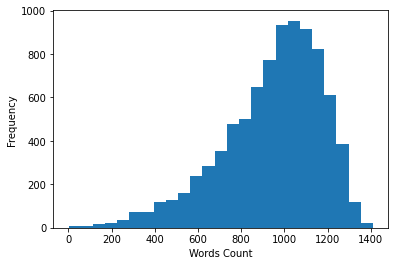

In [ ]:
plot_counts(data, column="words_count", xlabel="Words Count")


In [ ]:
data["char_count"] = data["cleaned_post"].apply(lambda x: len(x))
data.head(5)

,type,posts,E-I,N-S,F-T,J-P,cleaned_post,words_count,char_count
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,I,N,F,J,and intj moments sportscenter not top ten play...,454,2764
1,ENTP,'I'm finding the lack of me in these posts ver...,E,N,T,P,finding the lack these posts very alarming sex...,874,5104
2,INTP,'Good one _____ https://www.youtube.com/wat...,I,N,T,P,good one course which say know that blessing a...,653,4000
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",I,N,T,J,dear intp enjoyed our conversation the other d...,820,4938
4,ENTJ,'You're fired.|||That's another silly misconce...,E,N,T,J,you are fired that another silly misconception...,782,4692


**⏩ Just For Dataset Exploration: Finding More requent Words ⚡⚡**

Finding stopwords i.e. set of commonly used words in any language. Eg.“the”, “is” and “and”, would easily qualify as stop words - Removing unimportant words.

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
#stopwords are the words which have no meaning in the sentence but need to be filtered to balanc ethe dataset - stopwords are from nltk lib
stopword_list = stopwords.words("english")


In [ ]:
# Finding t he common words from dataset- Just for exploration
def get_most_frequent(data, stop_words, column="cleaned_post", top=25):
    df = data[column].apply(lambda x: " ".join([word for word in x.split() if not word in stop_words]))
    counter = Counter(" ".join(df).split())
    return counter.most_common(top)

In [ ]:
most_frequents = get_most_frequent(data, stopword_list)
most_frequents[:10]

[('like', 69678),
 ('would', 52964),
 ('think', 49837),
 ('people', 48150),
 ('know', 38174),
 ('one', 37173),
 ('really', 35343),
 ('get', 30806),
 ('time', 27610),
 ('feel', 23337)]

In [ ]:
def show_most_frequents(most_frequent_words, top=20):
    most_frequent_df = pd.DataFrame(most_frequent_words)    
    plt.figure(figsize=(16,4))
    my_cmap = plt.get_cmap("viridis")
    plt.bar(x=most_frequent_df.iloc[:top, 0], height=most_frequent_df.iloc[:top, 1], color="slateblue")
    plt.xlabel("Words", size=17)
    plt.ylabel("Counts", size=17)
    plt.title("Most Frequent Words", size = 10)
    plt.show()

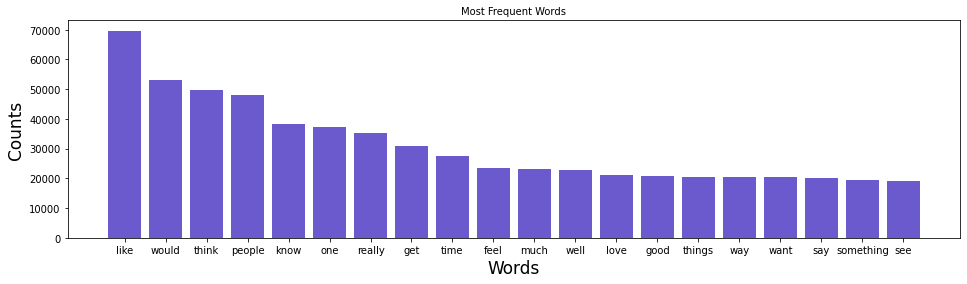

In [ ]:
show_most_frequents(most_frequents)

**⏩ Word Clouds**

In [ ]:
#finding word cloud
def show_wordcloud(data, stopword_list, column="cleaned_post"):
    fig = plt.figure(figsize=(10,2))
    wordcloud = WordCloud(background_color="black", min_font_size=5, stopwords=stopword_list).generate(data[column].to_string())
    plt.axis("off")
    plt.imshow(wordcloud)
    plt.show()


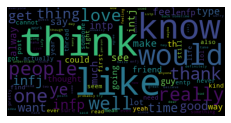

In [ ]:
show_wordcloud(data, stopword_list)

In [ ]:
#finding wordcloud for all classes
def show_sub_wordclouds(data, type_column, column, size, fig_size=(20,15)):
    classes = data[type_column].unique()
    fig, ax = plt.subplots(len(classes), figsize=fig_size)
    j = 0
    for _class in classes:
        temp = data[data[type_column] == _class]
        wordcloud = WordCloud(background_color="white").generate(temp[column].to_string())
        plt.subplot(*size, j+1)
        plt.title(_class, size=25)
        plt.imshow(wordcloud)
        plt.axis("off")
        j+=1

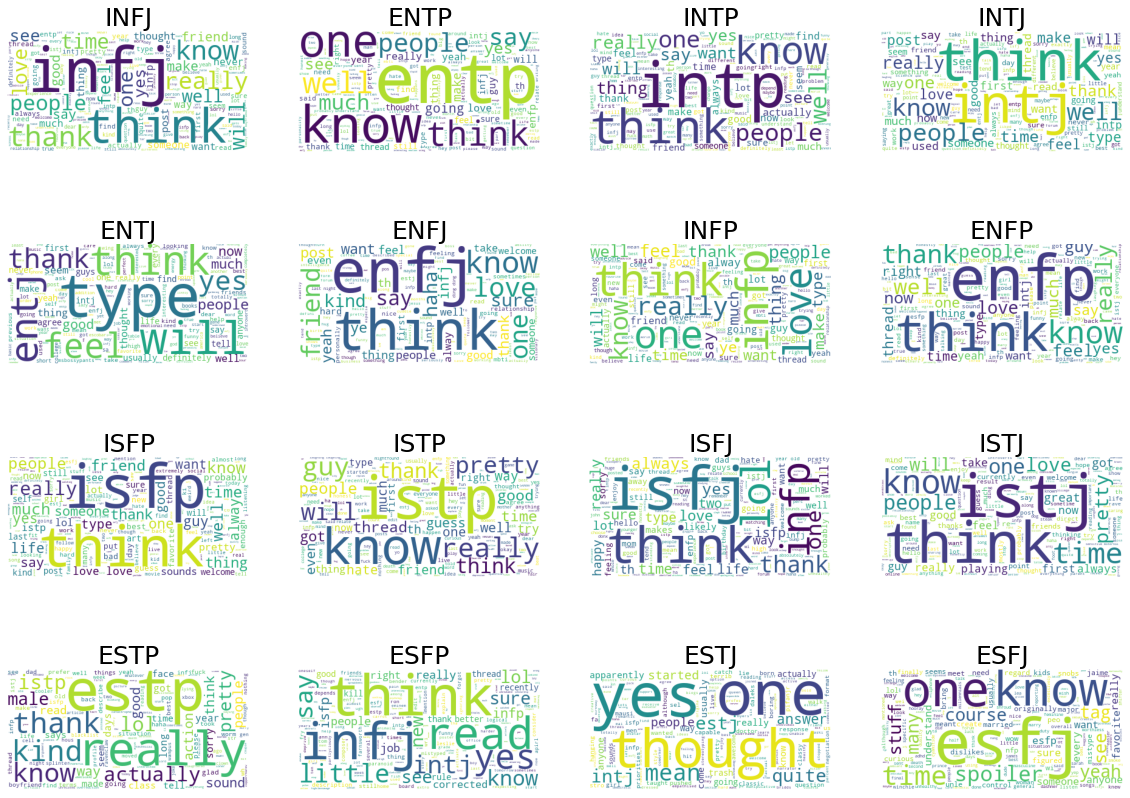

In [ ]:
show_sub_wordclouds(data, type_column="type" , column="cleaned_post", size=(4,4))


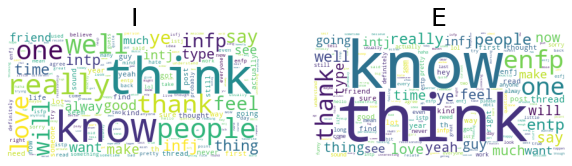

In [ ]:
show_sub_wordclouds(data, type_column="E-I" , column="cleaned_post", size=(1,2), fig_size=(10,5))

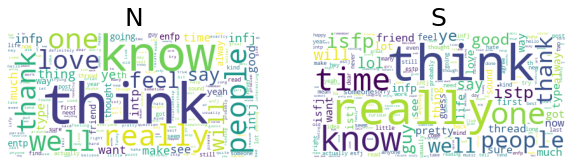

In [ ]:
show_sub_wordclouds(data, type_column="N-S" , column="cleaned_post", size=(1,2), fig_size=(10,5))


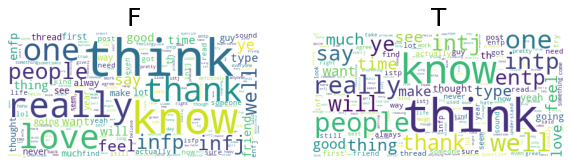

In [ ]:
show_sub_wordclouds(data, type_column="F-T" , column="cleaned_post", size=(1,2), fig_size=(10,5))


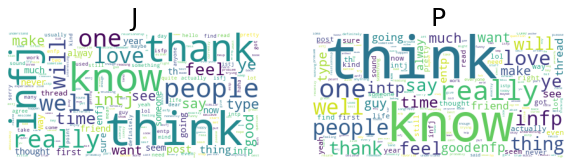

In [ ]:
show_sub_wordclouds(data, type_column="J-P" , column="cleaned_post", size=(1,2), fig_size=(10,5))


**⏩N-grams**

In [ ]:
def get_ngrams(data, n_gram, new_column, column="cleaned_post"):
    data["tokenized"]  = data[column].apply(lambda x: x.split())
    data["sw_removal"] = data["tokenized"].apply(lambda x: [y for y in x if not y in stopword_list])
    data[new_column]   = data["sw_removal"].apply(lambda x: list(ngrams(x, n_gram)))
    data.drop(columns  = ["tokenized", "sw_removal"], inplace=True)
    return data

In [ ]:
data = get_ngrams(data, n_gram=2, new_column="bigrams")
data.head()

,type,posts,E-I,N-S,F-T,J-P,cleaned_post,words_count,char_count,bigrams
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,I,N,F,J,and intj moments sportscenter not top ten play...,454,2764,"[(intj, moments), (moments, sportscenter), (sp..."
1,ENTP,'I'm finding the lack of me in these posts ver...,E,N,T,P,finding the lack these posts very alarming sex...,874,5104,"[(finding, lack), (lack, posts), (posts, alarm..."
2,INTP,'Good one _____ https://www.youtube.com/wat...,I,N,T,P,good one course which say know that blessing a...,653,4000,"[(good, one), (one, course), (course, say), (s..."
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",I,N,T,J,dear intp enjoyed our conversation the other d...,820,4938,"[(dear, intp), (intp, enjoyed), (enjoyed, conv..."
4,ENTJ,'You're fired.|||That's another silly misconce...,E,N,T,J,you are fired that another silly misconception...,782,4692,"[(fired, another), (another, silly), (silly, m..."


In [ ]:
data = get_ngrams(data, n_gram=3, new_column="trigrams")
data.head()

,type,posts,E-I,N-S,F-T,J-P,cleaned_post,words_count,char_count,bigrams,trigrams
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,I,N,F,J,and intj moments sportscenter not top ten play...,454,2764,"[(intj, moments), (moments, sportscenter), (sp...","[(intj, moments, sportscenter), (moments, spor..."
1,ENTP,'I'm finding the lack of me in these posts ver...,E,N,T,P,finding the lack these posts very alarming sex...,874,5104,"[(finding, lack), (lack, posts), (posts, alarm...","[(finding, lack, posts), (lack, posts, alarmin..."
2,INTP,'Good one _____ https://www.youtube.com/wat...,I,N,T,P,good one course which say know that blessing a...,653,4000,"[(good, one), (one, course), (course, say), (s...","[(good, one, course), (one, course, say), (cou..."
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",I,N,T,J,dear intp enjoyed our conversation the other d...,820,4938,"[(dear, intp), (intp, enjoyed), (enjoyed, conv...","[(dear, intp, enjoyed), (intp, enjoyed, conver..."
4,ENTJ,'You're fired.|||That's another silly misconce...,E,N,T,J,you are fired that another silly misconception...,782,4692,"[(fired, another), (another, silly), (silly, m...","[(fired, another, silly), (another, silly, mis..."


**⏩ Data Preprocessing**
 
✅ Removing Stopwords

✅Lemmatization



In [ ]:
#Stopword Removal
def remove_stopwords(data, stopword_list, column="cleaned_post"):
    data[column] = data[column].apply(word_tokenize)
    data[column] = data[column].apply(lambda x: [word for word in x if not word in stopword_list])
    return data

In [ ]:
nltk.download("wordnet")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
"""->applying Lemmatization 
We used nltk.stem.WordNetLemmatizer to lemmatize the text, meaning that inflected forms of the same root word were transformed into their dictionary form 
(e.g. ”walking”, ”walked”, ”walk” all become ”walk”). This will allow us to make use of the fact that inflected forms of the same word still carry one #
shared meaning."""

def apply_lemmatization(text):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(w) for w in text]

In [ ]:
def lemmatize(data, stopword_list, column="cleaned_post"):
    data[column] = data[column].apply(apply_lemmatization)
    data[column] = data[column].apply(" ".join)
    return data

In [ ]:
data = remove_stopwords(data, stopword_list)

In [ ]:
data = lemmatize(data, stopword_list)

In [ ]:
data.head()

,type,posts,E-I,N-S,F-T,J-P,cleaned_post,words_count,char_count
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,I,N,F,J,intj moment sportscenter top ten play prank li...,454,2764
1,ENTP,'I'm finding the lack of me in these posts ver...,E,N,T,P,finding lack post alarming sex boring position...,874,5104
2,INTP,'Good one _____ https://www.youtube.com/wat...,I,N,T,P,good one course say know blessing curse absolu...,653,4000
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",I,N,T,J,dear intp enjoyed conversation day esoteric ga...,820,4938
4,ENTJ,'You're fired.|||That's another silly misconce...,E,N,T,J,fired another silly misconception approaching ...,782,4692


In [ ]:
training_data = data[["cleaned_post", "E-I", "N-S", "F-T", "J-P"]].copy()
training_data.head(5)

,cleaned_post,E-I,N-S,F-T,J-P
0,intj moment sportscenter top ten play prank li...,I,N,F,J
1,finding lack post alarming sex boring position...,E,N,T,P
2,good one course say know blessing curse absolu...,I,N,T,P
3,dear intp enjoyed conversation day esoteric ga...,I,N,T,J
4,fired another silly misconception approaching ...,E,N,T,J


In [ ]:
def make_dummies(data, columns=["E-I", "N-S", "F-T", "J-P"]):
    for column in columns:
        temp_dummy = pd.get_dummies(data[column], prefix="type")
        data = data.join(temp_dummy)
    return data


In [ ]:
#Making dummy for each 4 characterstics that help define MBTI type
training_data = make_dummies(training_data)
training_data.head()

,cleaned_post,E-I,N-S,F-T,J-P,type_E,type_I,type_N,type_S,type_F,type_T,type_J,type_P
0,intj moment sportscenter top ten play prank li...,I,N,F,J,0,1,1,0,1,0,1,0
1,finding lack post alarming sex boring position...,E,N,T,P,1,0,1,0,0,1,0,1
2,good one course say know blessing curse absolu...,I,N,T,P,0,1,1,0,0,1,0,1
3,dear intp enjoyed conversation day esoteric ga...,I,N,T,J,0,1,1,0,0,1,1,0
4,fired another silly misconception approaching ...,E,N,T,J,1,0,1,0,0,1,1,0


**⏩Handling Imbalanced Data**

In [ ]:
X = training_data[["cleaned_post"]]
y = training_data.drop(columns=["cleaned_post"])

In [ ]:
print (X.head(5))
print(y.head(5))

                                        cleaned_post
0  intj moment sportscenter top ten play prank li...
1  finding lack post alarming sex boring position...
2  good one course say know blessing curse absolu...
3  dear intp enjoyed conversation day esoteric ga...
4  fired another silly misconception approaching ...
  E-I N-S F-T J-P  type_E  type_I  type_N  type_S  type_F  type_T  type_J  \
0   I   N   F   J       0       1       1       0       1       0       1   
1   E   N   T   P       1       0       1       0       0       1       0   
2   I   N   T   P       0       1       1       0       0       1       0   
3   I   N   T   J       0       1       1       0       0       1       1   
4   E   N   T   J       1       0       1       0       0       1       1   

   type_P  
0       0  
1       1  
2       1  
3       0  
4       0  


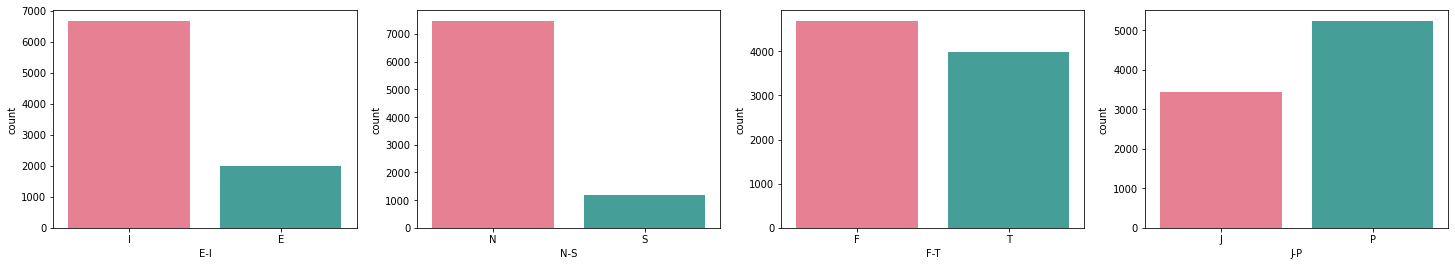

In [ ]:
def show_distribution(data, x=["E-I", "N-S", "F-T","J-P"], fig_size=(25,4), xticks_size=10, palette="husl"):
    fig, ax = plt.subplots(len(x), figsize=fig_size)
    j = 0
    for _x in x:
        plt.subplot(1,4, j+1)
        sns.countplot(x=_x, data=data, palette=palette)
        plt.xticks(size=xticks_size)
        j+=1    
        
show_distribution(data)

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
oversample = RandomOverSampler()

In [ ]:
y_ei = y["type_E"]
y_ns = y["type_N"]
y_ft = y["type_F"]
y_jp = y["type_J"]

In [ ]:
X_over_ei, y_over_ei = oversample.fit_resample(X, y_ei)
X_over_ns, y_over_ns = oversample.fit_resample(X, y_ns)
X_over_ft, y_over_ft = oversample.fit_resample(X, y_ft)
X_over_jp, y_over_jp = oversample.fit_resample(X, y_jp)

**⏩Train-Test Split For Each Model**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train_ei, X_test_ei, y_train_ei, y_test_ei = train_test_split(X_over_ei, y_over_ei, test_size=0.3, random_state=42)
X_train_ns, X_test_ns, y_train_ns, y_test_ns = train_test_split(X_over_ns, y_over_ns, test_size=0.3, random_state=42)
X_train_ft, X_test_ft, y_train_ft, y_test_ft = train_test_split(X_over_ft, y_over_ft, test_size=0.3, random_state=42)
X_train_jp, X_test_jp, y_train_jp, y_test_jp = train_test_split(X_over_jp, y_over_jp, test_size=0.3, random_state=42)

In [ ]:
X_train_ei = X_train_ei['cleaned_post']
X_train_ns = X_train_ns['cleaned_post']
X_train_ft = X_train_ft['cleaned_post']
X_train_jp = X_train_jp['cleaned_post']

In [ ]:
X_test_ei = X_test_ei['cleaned_post']
X_test_ns = X_test_ns['cleaned_post']
X_test_ft = X_test_ft['cleaned_post']
X_test_jp = X_test_jp['cleaned_post']

In [ ]:
y_train_ei.name, y_test_ei.name = "E-I", "E-I"
y_train_ns.name, y_test_ns.name = "N-S", "N-S"
y_train_ft.name, y_test_ft.name = "F-T", "F-T"
y_train_jp.name, y_test_jp.name = "J-P", "J-P"

In [ ]:
y_all_train = [y_train_ei, y_train_ns, y_train_ft,  y_train_jp]
y_all_test  = [y_test_ei, y_test_ns, y_test_ft, y_test_jp] 

**⏩Vectorization: TF-IDF VEctorization**

Term frequency-inverse document frequency is a text vectorizer that transforms the text into a usable vector.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer = TfidfVectorizer(max_features=10000)

In [ ]:
vectorizer.fit(X_train_ei)

TfidfVectorizer(max_features=10000)

In [ ]:
X_train_ei = vectorizer.transform(X_train_ei)
X_test_ei  = vectorizer.transform(X_test_ei)

X_train_ns = vectorizer.transform(X_train_ns)
X_test_ns  = vectorizer.transform(X_test_ns)

X_train_ft = vectorizer.transform(X_train_ft)
X_test_ft  = vectorizer.transform(X_test_ft)

X_train_jp = vectorizer.transform(X_train_jp)
X_test_jp  = vectorizer.transform(X_test_jp)

In [ ]:
feature_names=vectorizer.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
feature_names

['aaaand',
 'ab',
 'aback',
 'abandon',
 'abandoned',
 'abandonment',
 'abba',
 'abbey',
 'abhor',
 'ability',
 'abit',
 'able',
 'abnormal',
 'aboard',
 'abortion',
 'abrasive',
 'abroad',
 'abruptly',
 'absence',
 'absent',
 'absolute',
 'absolutely',
 'absorb',
 'absorbed',
 'absorbing',
 'abstract',
 'abstraction',
 'absurd',
 'abundance',
 'abuse',
 'abused',
 'abuser',
 'abusing',
 'abusive',
 'abyss',
 'academia',
 'academic',
 'academically',
 'academy',
 'accent',
 'accept',
 'acceptable',
 'acceptance',
 'accepted',
 'accepting',
 'accepts',
 'access',
 'accessible',
 'accident',
 'accidental',
 'accidentally',
 'accommodating',
 'accommodation',
 'accompanied',
 'accomplish',
 'accomplished',
 'accomplishing',
 'accomplishment',
 'according',
 'accordingly',
 'account',
 'accountable',
 'accountant',
 'accounting',
 'accumulated',
 'accuracy',
 'accurate',
 'accurately',
 'accusation',
 'accuse',
 'accused',
 'accusing',
 'accustomed',
 'ace',
 'acerbusvenator',
 'ache',
 'a

In [ ]:
x_all_train = [X_train_ei, X_train_ns, X_train_ft, X_train_jp]
x_all_test  = [X_test_ei, X_test_ns, X_test_ft, X_test_jp]

In [ ]:
tf_idf = pd.DataFrame(X_test_ei.toarray(), columns=vectorizer.get_feature_names_out())
tf_idf.head(10)

,aaaand,ab,aback,abandon,abandoned,abandonment,abba,abbey,abhor,ability,...,zeppelin,zero,zodiac,zoe,zombie,zone,zoned,zoning,zoo,zooey
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.0,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.0,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.127133,0.0,0.00000,0.0,0.0,0.0,0.063229
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.0,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.117902,0.000000,0.0,0.04549,0.0,0.0,0.0,0.000000
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.0,0.000000
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.0,0.000000
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028586,...,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.0,0.000000
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.0,0.000000
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.030689,...,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.0,0.000000


**⏩Model Creation & Model Training & Model Saving**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost
import pickle
from sklearn import metrics

In [ ]:
def create_models():
    nb_clf  = MultinomialNB(alpha=0.01)
    svm_clf = SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
    dt_clf  = DecisionTreeClassifier(max_depth=7)
    rf_clf  = RandomForestClassifier(n_estimators=750)
    xgb_clf = xgboost.XGBClassifier(use_label_encoder=False)
    return {"NaiveBayes":nb_clf, "SVM":svm_clf, "DecisionTree":dt_clf, "RandomForest":rf_clf, "Xgboost":xgb_clf}

**⏩Model Performance Evaluation with accuracy & f1-score & roc-auc score**

In [ ]:
_metrics = ["Accuracy", "Accuracy", "Accuracy" ,"Accuracy", "Precision", "Precision", "Precision","Precision", "Recall","Recall","Recall","Recall", "F1-Score", "F1-Score", "F1-Score", "F1-Score", "Roc-Auc Score", "Roc-Auc Score", "Roc-Auc Score", "Roc-Auc Score"]
_types   = ["E-I", "N-S", "F-T", "J-P", "E-I", "N-S", "F-T", "J-P", "E-I", "N-S", "F-T", "J-P","E-I", "N-S", "F-T", "J-P","E-I", "N-S", "F-T", "J-P"]
_columns = ["NaiveBayes", "SVM", "DecisionTree", "RandomForest", "Xgboost"]

In [ ]:
evaluation_df = pd.DataFrame(columns=_columns, index=[_metrics, _types])
#evaluation_df

In [ ]:
models = create_models()
models

{'DecisionTree': DecisionTreeClassifier(max_depth=7),
 'NaiveBayes': MultinomialNB(alpha=0.01),
 'RandomForest': RandomForestClassifier(n_estimators=750),
 'SVM': SVC(gamma='auto', kernel='linear'),
 'Xgboost': XGBClassifier(use_label_encoder=False)}

In [ ]:
for model_item in models.items():
    for X_train, X_test, y_train, y_test in zip(x_all_train, x_all_test, y_all_train, y_all_test):
        # Model creation and prediction
        model = model_item[1]
        print(f"{model} is training for {y_train.name}...")
        model.fit(X_train, y_train)
        pred = model.predict(X_test)
        # Performance evaluation metrics
        evaluation_df.loc["Accuracy",y_train.name][model_item[0]]      = round(metrics.accuracy_score(y_test, pred), 3)
        evaluation_df.loc["Precision",y_train.name][model_item[0]]     = round(metrics.precision_score(y_test, pred), 3)
        evaluation_df.loc["Recall",y_train.name][model_item[0]]        = round(metrics.recall_score(y_test, pred), 3)        
        evaluation_df.loc["F1-Score",y_train.name][model_item[0]]      = round(metrics.f1_score(y_test, pred), 3)
        evaluation_df.loc["Roc-Auc Score",y_train.name][model_item[0]] = round(metrics.roc_auc_score(y_test, pred), 3)        
        # Save model
        filename = f'/MyDrive/MyDrive/Major2/Models/{model_item[0]}_{y_test.name}.sav'
        pickle.dump(model,open(filename, 'wb'))

MultinomialNB(alpha=0.01) is training for E-I...
MultinomialNB(alpha=0.01) is training for N-S...
MultinomialNB(alpha=0.01) is training for F-T...
MultinomialNB(alpha=0.01) is training for J-P...
SVC(gamma='auto', kernel='linear') is training for E-I...
SVC(gamma='auto', kernel='linear') is training for N-S...
SVC(gamma='auto', kernel='linear') is training for F-T...
SVC(gamma='auto', kernel='linear') is training for J-P...
DecisionTreeClassifier(max_depth=7) is training for E-I...
DecisionTreeClassifier(max_depth=7) is training for N-S...
DecisionTreeClassifier(max_depth=7) is training for F-T...
DecisionTreeClassifier(max_depth=7) is training for J-P...
RandomForestClassifier(n_estimators=750) is training for E-I...
RandomForestClassifier(n_estimators=750) is training for N-S...
RandomForestClassifier(n_estimators=750) is training for F-T...
RandomForestClassifier(n_estimators=750) is training for J-P...
XGBClassifier(use_label_encoder=False) is training for E-I...
XGBClassifier(use_

In [ ]:
evaluation_df

NaiveBayes    SVM DecisionTree RandomForest Xgboost
Accuracy      E-I       0.82  0.894        0.786        0.958   0.845
              N-S      0.894   0.95        0.802        0.992   0.874
              F-T      0.809  0.857        0.759        0.841   0.831
              J-P      0.729  0.807        0.706        0.842   0.803
Precision     E-I      0.825   0.88        0.816        0.986   0.865
              N-S      0.888  0.979        0.765         0.99   0.868
              F-T      0.807  0.856        0.786        0.832   0.842
              J-P      0.727  0.802        0.671        0.912   0.808
Recall        E-I      0.814  0.914        0.742        0.929   0.819
              N-S      0.905   0.92        0.877        0.995   0.883
              F-T      0.813  0.859        0.711        0.854   0.814
              J-P      0.727  0.811        0.804        0.754   0.792
F1-Score      E-I      0.819  0.897        0.777        0.957   0.841
              N-S      0.896  0.949        0.817        0.993   0.876
              F-T       0.81  0.857        0.747        0.843   0.828
              J-P      0.727  0.807        0.731        0.826     0.8
Roc-Auc Score E-I       0.82  0.894        0.786        0.958   0.845
              N-S      0.894   0.95        0.801        0.992   0.874
              F-T      0.809  0.857        0.759        0.841   0.831
              J-P      0.729  0.807        0.707        0.841   0.803

**⏩Save Tf-Idf Vectorizer**

In [ ]:
filename = '/MyDrive/MyDrive/Major2/Models/vectorizer.pkl'
pickle.dump(vectorizer,open(filename, 'wb'))

##🎊🎉## 
Conclusion: Our classification as limited to Naive BAyes and Random Forest classifiers based on the research but we tested or datafor every classifier. We selected the Random Forest to be used based on its accuracy even through for F-T and J-P it shows less result than SVM but the difference is negligible Hence **We decided to go for Random Forest Classifier** 
##🥳💥##